# Import Dataset

In [51]:
import pandas as pd
import numpy as np

In [52]:
df = pd.read_csv('AdmissionPredict.csv')

In [53]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4,4.0,4.5,8.87,1,NaN
2,3,316.0,NaN,3,3.0,3.5,8.00,1,0.72
3,4,NaN,110.0,3,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2,2.0,3.0,8.21,0,0.65


In [54]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,378.000000,380.000000,400.000000,400.000000,400.000000,380.000000,400.000000,384.000000
mean,200.500000,316.759259,107.386842,3.087500,3.400000,3.452500,8.604737,0.547500,0.724375
std,115.614301,11.415599,6.048645,1.143728,1.006869,0.898478,0.599167,0.498362,0.142964
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.250000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.640000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.080000,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          378 non-null    float64
 2   TOEFL Score        380 non-null    float64
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               380 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    384 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 28.2 KB


# Data Exploratory Analysis

## Dealing With Missing Data
Let's see which column has NaN values : 

In [56]:
df.isnull().sum()

Serial No.            0
GRE Score            22
TOEFL Score          20
University Rating     0
SOP                   0
LOR                   0
CGPA                 20
Research              0
Chance of Admit      16
dtype: int64

Let's drop NaN values in Chance of Admit column:

In [57]:
df = df[df['Chance of Admit'].notna()]
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4,4.5,4.5,9.65,1,0.92
2,3,316.0,NaN,3,3.0,3.5,8.00,1,0.72
3,4,NaN,110.0,3,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2,2.0,3.0,8.21,0,0.65
5,6,330.0,115.0,5,4.5,3.0,9.34,1,0.90
...,...,...,...,...,...,...,...,...,...
394,395,329.0,111.0,4,4.5,4.0,9.23,1,0.89
395,396,324.0,110.0,3,3.5,3.5,9.04,1,0.82
397,398,330.0,116.0,4,5.0,4.5,9.45,1,0.91
398,399,312.0,103.0,3,3.5,4.0,8.78,0,0.67


## For filling NaN vlues, we have 2 options:

1) Filling with median vlue of each column:

In [58]:
# we have missing data, only in 'GRE Score', 'TOEFL Score' and 'CGPA' columns.
temp_df_nonan = df.copy()
temp_df_nonan['GRE Score'].replace(np.nan, temp_df_nonan['GRE Score'].median(), inplace=True)
temp_df_nonan['TOEFL Score'].replace(np.nan, temp_df_nonan['TOEFL Score'].median(), inplace=True)
temp_df_nonan['CGPA'].replace(np.nan, temp_df_nonan['CGPA'].median(), inplace=True)
temp_df_nonan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 384 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         384 non-null    int64  
 1   GRE Score          384 non-null    float64
 2   TOEFL Score        384 non-null    float64
 3   University Rating  384 non-null    int64  
 4   SOP                384 non-null    float64
 5   LOR                384 non-null    float64
 6   CGPA               384 non-null    float64
 7   Research           384 non-null    int64  
 8   Chance of Admit    384 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 30.0 KB


2) Finding correlation and filling with mean of subset of each column: (we choose this method for other parts)

### GRE Score

In [59]:
df.corr()['GRE Score'].drop('GRE Score').sort_values(ascending = False)

TOEFL Score          0.840993
CGPA                 0.830727
Chance of Admit      0.805076
University Rating    0.671549
SOP                  0.620963
Research             0.588385
LOR                  0.556729
Serial No.          -0.105022
Name: GRE Score, dtype: float64

We will group the dataframe by University Rating(Because there's a high correlation between ) and calculate the average value for GRE Score per University Rating

In [60]:
Per_UR = df.groupby('University Rating').mean()['GRE Score']
Per_UR

University Rating
1    303.520000
2    309.410526
3    315.790323
4    324.671875
5    328.642857
Name: GRE Score, dtype: float64

In [61]:
def fill_nan(uni_rating, second) :
  if np.isnan(second) : 
    return Per_UR[uni_rating]
  else :
    return second

df['GRE Score'] = df.apply(lambda row : fill_nan(row['University Rating'],row['GRE Score']),axis = 1)

In [62]:
df.isnull().sum()

Serial No.            0
GRE Score             0
TOEFL Score          19
University Rating     0
SOP                   0
LOR                   0
CGPA                 20
Research              0
Chance of Admit       0
dtype: int64

### TOEFL Score Column

In [63]:
df.corr()['TOEFL Score'].drop('TOEFL Score').sort_values(ascending = False)

GRE Score            0.834685
CGPA                 0.828364
Chance of Admit      0.783667
University Rating    0.689511
SOP                  0.647810
LOR                  0.556272
Research             0.509609
Serial No.          -0.153994
Name: TOEFL Score, dtype: float64

In [64]:
Per_UR = df.groupby('University Rating').mean()['TOEFL Score']
Per_UR

University Rating
1     99.240000
2    103.729167
3    107.000000
4    111.530303
5    113.800000
Name: TOEFL Score, dtype: float64

In [65]:
df['TOEFL Score'] = df.apply(lambda row : fill_nan(row['University Rating'],row['TOEFL Score']),axis = 1)

In [66]:
df.isnull().sum()

Serial No.            0
GRE Score             0
TOEFL Score           0
University Rating     0
SOP                   0
LOR                   0
CGPA                 20
Research              0
Chance of Admit       0
dtype: int64

### CGPA Column

In [67]:
df.corr()['CGPA'].drop('CGPA').sort_values(ascending = False)

Chance of Admit      0.872492
GRE Score            0.824538
TOEFL Score          0.824481
University Rating    0.750312
SOP                  0.720422
LOR                  0.669002
Research             0.527005
Serial No.          -0.058785
Name: CGPA, dtype: float64

In [68]:
Per_UR = df.groupby('University Rating').mean()['CGPA']
Per_UR

University Rating
1    7.750000
2    8.196064
3    8.550000
4    9.020746
5    9.316909
Name: CGPA, dtype: float64

In [69]:
df['CGPA'] = df.apply(lambda row : fill_nan(row['University Rating'],row['CGPA']),axis = 1)

In [70]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

## Scatterplot

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='Serial No.', ylabel='Chance of Admit'>

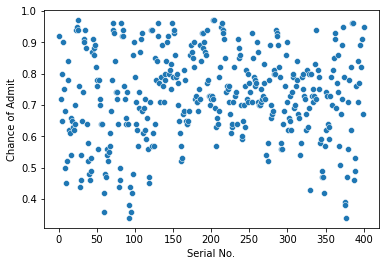

In [79]:
sns.scatterplot(data = df, y = 'Chance of Admit', x = 'Serial No.')

<AxesSubplot:xlabel='GRE Score', ylabel='Chance of Admit'>

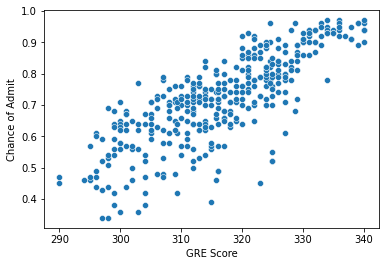

In [78]:
sns.scatterplot(data = df, y = 'Chance of Admit', x = 'GRE Score')

<AxesSubplot:xlabel='TOEFL Score', ylabel='Chance of Admit'>

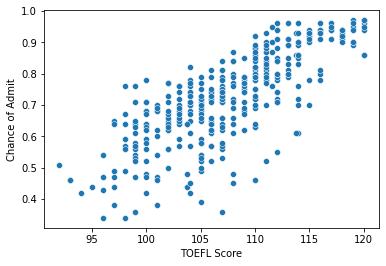

In [73]:
sns.scatterplot(data = df, y = 'Chance of Admit', x = 'TOEFL Score')

<AxesSubplot:xlabel='University Rating', ylabel='Chance of Admit'>

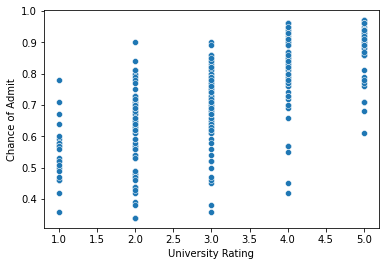

In [74]:
sns.scatterplot(data = df, y = 'Chance of Admit', x = 'University Rating')

<AxesSubplot:xlabel='SOP', ylabel='Chance of Admit'>

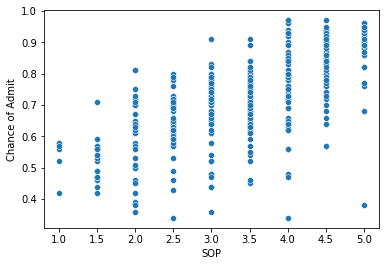

In [75]:
sns.scatterplot(data = df, y = 'Chance of Admit', x = 'SOP')

<AxesSubplot:xlabel='CGPA', ylabel='Chance of Admit'>

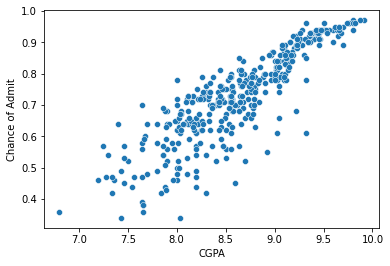

In [76]:
sns.scatterplot(data = df, y = 'Chance of Admit', x = 'CGPA')

<AxesSubplot:xlabel='Research', ylabel='Chance of Admit'>

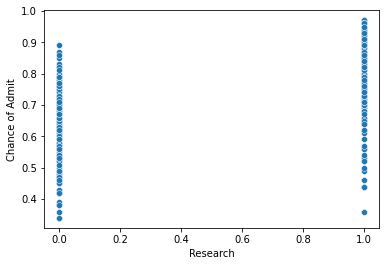

In [80]:
sns.scatterplot(data = df, y = 'Chance of Admit', x = 'Research')

It seems **CGPA** correlates more with Chance of Admission. if you ignore noisy points in plot, you can fit a straight line to example points of dataset in plot, approximately.

# Training the model

## Train / Test Split

In [81]:
from sklearn.model_selection import train_test_split

In [124]:
X = df.drop(['Serial No.','Chance of Admit'],axis = 1)
y = df['Chance of Admit']

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Scaling

In [84]:
from sklearn.preprocessing import MinMaxScaler

In [125]:
scaler = MinMaxScaler()

In [142]:
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

X_train_mat = np.c_[np.ones(X_train.shape[0]), X_train['CGPA']]
X_test_mat = np.c_[np.ones(X_test.shape[0]), X_test['CGPA']]

X_train_mat_scaled = np.c_[np.ones(X_train_scaled.shape[0]), X_train_scaled['CGPA']]
X_test_mat_scaled = np.c_[np.ones(X_test_scaled.shape[0]), X_test_scaled['CGPA']]

In [143]:
X_train_mat_scaled

array([[1.        , 0.28782288],
       [1.        , 0.49815498],
       [1.        , 0.46125461],
       [1.        , 0.29520295],
       [1.        , 0.25461255],
       [1.        , 0.17343173],
       [1.        , 0.3800738 ],
       [1.        , 0.72693727],
       [1.        , 0.74538745],
       [1.        , 0.16236162],
       [1.        , 0.53505535],
       [1.        , 0.37638376],
       [1.        , 0.53505535],
       [1.        , 0.39483395],
       [1.        , 0.29520295],
       [1.        , 0.74538745],
       [1.        , 0.73062731],
       [1.        , 0.29520295],
       [1.        , 0.25830258],
       [1.        , 0.58302583],
       [1.        , 0.31734317],
       [1.        , 0.16236162],
       [1.        , 0.46863469],
       [1.        , 0.67896679],
       [1.        , 0.64944649],
       [1.        , 0.96678967],
       [1.        , 0.50553506],
       [1.        , 0.36900369],
       [1.        , 0.84870849],
       [1.        , 0.3099631 ],
       [1.

## Performing Linear Regression Using the Normal Equation

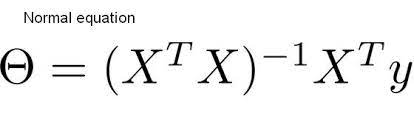


In [144]:
from numpy.linalg import inv

X_train_transpose = np.transpose(X_train_mat)
theta = np.matmul(np.matmul(inv(np.matmul(X_train_transpose, X_train_mat)),X_train_transpose),y_train)

X_train_transpose = np.transpose(X_train_mat_scaled)
theta_scaled = np.matmul(np.matmul(inv(np.matmul(X_train_transpose, X_train_mat_scaled)),X_train_transpose),y_train)

# with non scaled train set
print(theta)
print('='*50)
# with scaled train set
print(theta_scaled)

[-1.11468397  0.21383338]
[0.42491634 0.57948845]


### Plotting Predictor fucntion on scatter plot of data set

In [ ]:
def predict(theta, data):
  return np.matmul(data,theta)

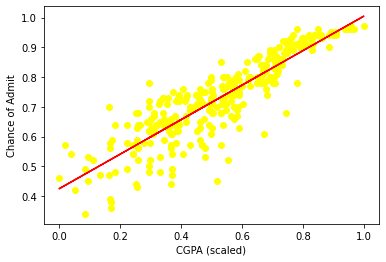

In [174]:
# scatter plot of training set
plt.scatter(X_train_scaled['CGPA'], y_train,c='yellow')

# predictor function (a line)
plt.plot(X_train_scaled['CGPA'], predict(theta_scaled, X_train_mat_scaled), c='r')

plt.xlabel('CGPA (scaled)')
plt.ylabel('Chance of Admit')
plt.show()

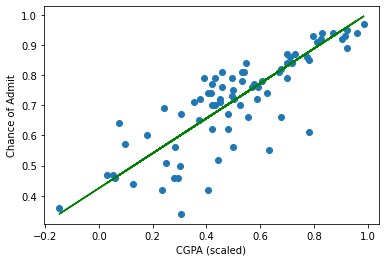

In [175]:
# scatter plot of test set
plt.scatter(X_test_scaled['CGPA'], y_test)

# output of predictor function (a line)
plt.plot(X_test_scaled['CGPA'], predict(theta_scaled, X_test_mat_scaled), c='green')

plt.xlabel('CGPA (scaled)')
plt.ylabel('Chance of Admit')
plt.show()

### Evaluating the model

In [168]:
from sklearn.metrics import mean_squared_error,explained_variance_score

In [169]:
predictions_scaled = predict(theta_scaled, X_test_mat_scaled)
predictions = predict(theta, X_test_mat)

### evaluation without scaling

In [170]:
np.sqrt(mean_squared_error(y_test,predictions))

0.09045138251027383

In [171]:
explained_variance_score(y_test,predictions)

0.6677899101214568

### evaluation with scaling

In [172]:
np.sqrt(mean_squared_error(y_test,predictions_scaled))

0.09045138251027812

In [173]:
explained_variance_score(y_test,predictions_scaled)

0.6677899101214164

### Using Scikit Learn (only scaled values)

In [202]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(pd.DataFrame(X_train_scaled['CGPA']), y_train)
predictions = reg.predict(pd.DataFrame(X_test_scaled['CGPA']))
predictions

array([0.72855973, 0.7584964 , 0.57032303, 0.45485301, 0.33938299,
       0.5874297 , 0.98088311, 0.71359139, 0.69006972, 0.81409308,
       0.95522311, 0.9295631 , 0.71145306, 0.66868638, 0.66868638,
       0.63019638, 0.66868638, 0.71145306, 0.77560307, 0.67510138,
       0.83119975, 0.59598304, 0.68151639, 0.5617697 , 0.7456664 ,
       0.46768301, 0.65157971, 0.60239804, 0.94880811, 0.75421973,
       0.87758215, 0.76704974, 0.7649114 , 0.6002597 , 0.84189142,
       0.73711306, 0.74138973, 0.95949977, 0.69006972, 0.83119975,
       0.90604143, 0.81836975, 0.44202301, 0.70289972, 0.9039031 ,
       0.95949977, 0.89534976, 0.45912968, 0.60239804, 0.66013305,
       0.66013305, 0.78843307, 0.56604636, 0.99585145, 0.83119975,
       0.58956803, 0.88679643, 0.71572973, 0.71359139, 0.68579305,
       0.87396642, 0.7328364 , 0.49761968, 0.64302638, 0.67510138,
       0.66654805, 0.48051301, 0.87824309, 0.81836975, 0.64088804,
       0.70289972, 0.7328364 , 0.84830642, 0.83761475, 0.79270

### Plotting

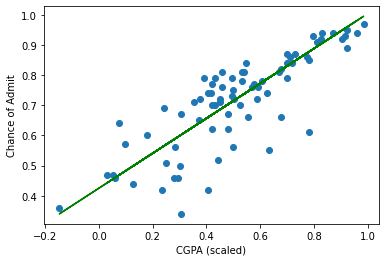

In [203]:
# scatter plot of test set
plt.scatter(X_test_scaled['CGPA'], y_test)

# output of predictor function (a line)
plt.plot(X_test_scaled['CGPA'], predictions, c='green')

plt.xlabel('CGPA (scaled)')
plt.ylabel('Chance of Admit')
plt.show()

### Evaluation

In [204]:
np.sqrt(mean_squared_error(y_test,predictions))

0.0904513825102781

In [205]:
explained_variance_score(y_test,predictions)

0.6677899101214171

## Training Model with 3 features

### we choose 'CGPA', 'GRE Score' and 'TOEFL Score' as 3 features

In [214]:
reg = LinearRegression().fit(X_train_scaled[['GRE Score', 'TOEFL Score', 'CGPA']], y_train)
predictions = reg.predict(X_test_scaled[['GRE Score', 'TOEFL Score', 'CGPA']])
predictions

array([0.72476773, 0.7643534 , 0.5342631 , 0.44751534, 0.37978076,
       0.57304369, 0.96023504, 0.66088914, 0.70831422, 0.82484739,
       0.95674097, 0.94112815, 0.71470286, 0.70452154, 0.64136751,
       0.60490541, 0.67420525, 0.72856302, 0.77018938, 0.66693167,
       0.85062006, 0.63085835, 0.71143778, 0.55739525, 0.74016375,
       0.5219926 , 0.65283892, 0.57636422, 0.96237998, 0.74908767,
       0.81904258, 0.77253129, 0.76489842, 0.6155005 , 0.84812869,
       0.75195882, 0.73698113, 0.97726659, 0.70916712, 0.8246062 ,
       0.93311258, 0.77436641, 0.44578611, 0.71441482, 0.90817233,
       0.96429495, 0.92519168, 0.44287934, 0.56858124, 0.65159768,
       0.66640753, 0.76246544, 0.57635597, 0.99308857, 0.83587203,
       0.57115214, 0.89458898, 0.76120738, 0.73015433, 0.66447527,
       0.87896397, 0.73658623, 0.48019435, 0.63176064, 0.6642661 ,
       0.68473268, 0.51160309, 0.86483919, 0.8176527 , 0.6474411 ,
       0.66330993, 0.74884745, 0.85464403, 0.82678579, 0.80463

### Plotting

#### how ??   :)

### Evaluation

#### as results below shows, MSE is lower than former part which means our model is predicting better

In [215]:
np.sqrt(mean_squared_error(y_test,predictions))

0.08369232434585369

In [216]:
explained_variance_score(y_test,predictions)

0.7163603184884166

## Training Model with all features of training set

In [217]:
reg = LinearRegression().fit(X_train_scaled, y_train)
predictions = reg.predict(X_test_scaled)
predictions

array([0.69258208, 0.81044288, 0.51310898, 0.45419164, 0.41815956,
       0.58656033, 0.96835885, 0.66388966, 0.73442086, 0.79897339,
       0.94701322, 0.95539983, 0.71502732, 0.74225043, 0.67048096,
       0.60906844, 0.64987854, 0.72660227, 0.78182432, 0.70040323,
       0.83204485, 0.65202882, 0.7370366 , 0.56705457, 0.71456166,
       0.54450931, 0.66018763, 0.59050255, 0.95158175, 0.75348727,
       0.7898388 , 0.7682848 , 0.72111588, 0.63795012, 0.81181554,
       0.78457268, 0.73335528, 0.93813201, 0.64606667, 0.81306901,
       0.93743907, 0.80528176, 0.48915406, 0.69371513, 0.89432217,
       0.96177364, 0.92125878, 0.44221111, 0.57322734, 0.61250893,
       0.70244802, 0.77584558, 0.55531143, 0.99406201, 0.80993688,
       0.54892312, 0.90795649, 0.76566316, 0.75064753, 0.63427477,
       0.90600008, 0.77946092, 0.50299323, 0.64243595, 0.6647382 ,
       0.68195785, 0.50693471, 0.83263111, 0.80717519, 0.63238343,
       0.65395333, 0.72136173, 0.86819596, 0.85715903, 0.78372

### Plotting

#### how ??   :)

### Evaluation

#### as results below shows, MSE is lower than former part which means our model is predicting better

In [218]:
np.sqrt(mean_squared_error(y_test,predictions))

0.08358009329950628

In [219]:
explained_variance_score(y_test,predictions)

0.7176123476324897

# Section 2

Text(0, 0.5, 'y')

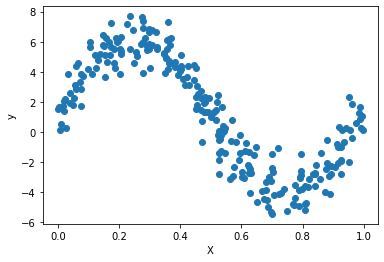

In [353]:
sample_size = 250
X = np.random.uniform(size=sample_size)
y = 5 * np.sin(X * 2 * np.pi)
y = y + np.random.normal(size=sample_size, loc=1)

plt.scatter(X, y)
plt.xlabel('X')
plt.ylabel('y')

#### degree 1

In [372]:
df = pd.DataFrame(np.c_[np.ones(sample_size), X], columns=[0,1])
x_train, x_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)

reg = LinearRegression().fit(x_train, y_train)
predictions = reg.predict(x_test)
predictions

array([ 3.97210043,  0.68848474,  1.45490427,  1.5514724 ,  3.9175524 ,
       -3.23554796, -1.37780797,  0.96452171, -1.88520519, -3.88663238,
        5.2384974 , -2.37191571, -3.90243095, -3.83892827,  0.26700292,
       -2.87652203,  3.22900943,  1.0993956 ,  3.01498137,  5.34275958,
        0.57855886,  1.18620897,  1.89379979, -3.10334244, -2.08619598,
       -0.10650509,  5.46926529,  1.98316657,  0.26239933,  1.99031596,
        4.24912763,  0.08150424, -3.2754211 ,  4.86963062,  2.74313288,
        2.40844772,  2.98163914,  3.20612683,  5.86890089,  1.9985294 ,
       -3.51752114,  3.26383458,  1.54332079,  0.66247602,  1.17679984,
        3.94078495,  4.03498547, -3.86282944, -0.98244668, -3.58137379])

Plotting

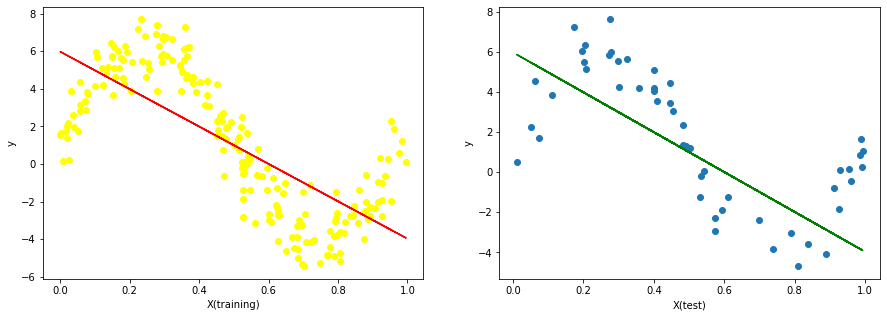

In [373]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

# scatter plot of training set
axes[0].scatter(x_train[1], y_train, c='yellow')

# output of predictor function (a line)
axes[0].plot(x_train[1], reg.predict(x_train), c='red')

# scatter plot of test set
axes[1].scatter(x_test[1], y_test)

# output of predictor function (a line)
axes[1].plot(x_test[1], predictions, c='green')

axes[0].set_xlabel('X(training)')
axes[0].set_ylabel('y')
axes[1].set_xlabel('X(test)')
axes[1].set_ylabel('y')
plt.show()

Evaluation

In [374]:
np.sqrt(mean_squared_error(y_test,predictions))

2.641475357897634

In [375]:
explained_variance_score(y_test,predictions)

0.4252132217145437

#### Degree 3

In [376]:
df[2], df[3] = np.power(X, 2), np.power(X, 3)

#split
x_train, x_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)

#scaling
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train) + np.array([[1,0,0,0]])
x_test = scaler.transform(x_test) + np.array([[1,0,0,0]])

#regression
reg = LinearRegression().fit(x_train, y_train)
predictions = reg.predict(x_test)
predictions

array([ 6.23445746,  0.17164391,  2.28803661,  2.54902716,  6.25070985,
       -1.16366367, -3.84004628,  0.93341051, -3.91482181,  2.09432482,
        3.81728469, -3.46853734,  2.19159025,  1.80608884, -0.9478287 ,
       -2.37879381,  5.95744033,  1.30821809,  5.70066584,  3.41916002,
       -0.12702439,  1.54920251,  3.44189084, -1.65632445, -3.79697279,
       -1.85695747,  2.89008767,  3.66418992, -0.95959655,  3.68174402,
        6.05100186, -1.41166069, -1.00439909,  4.96351533,  5.28021596,
        4.63797292,  5.65453542,  5.93335761,  0.87116172,  3.70186708,
        0.07230958,  5.99248247,  2.52712042,  0.10065661,  1.5231127 ,
        6.24455972,  6.20780084,  1.94948112, -3.46018757,  0.38850179])

Plotting

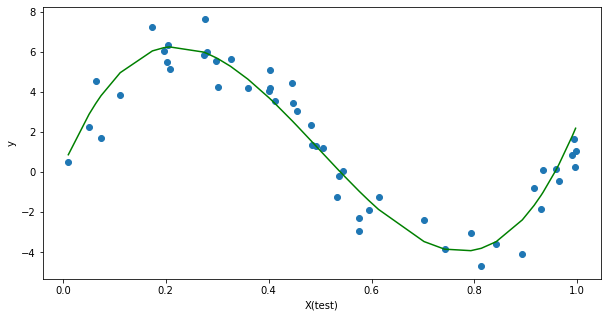

In [377]:
fig, axes = plt.subplots(1, 1, figsize=(10,5))

# scatter plot of test set
axes.scatter(np.transpose(x_test)[1], y_test)

# output of predictor function (a line)
unziped = list(zip(*sorted(zip(np.transpose(x_test)[1], predictions), key=lambda x: x[0])))
axes.plot(unziped[0], unziped[1], c='green')


axes.set_xlabel('X(test)')
axes.set_ylabel('y')
plt.show()


Evaluation

In [378]:
np.sqrt(mean_squared_error(y_test,predictions))

0.9713437480516063

In [379]:
explained_variance_score(y_test,predictions)

0.914523014305601

### Degree 7

In [399]:
df_mat = np.c_[df.to_numpy(), df.to_numpy() * np.c_[np.power(X, 4)]]
print(df_mat.shape)
#split
x_train, x_test, y_train, y_test = train_test_split(df_mat, y, test_size=0.2, random_state=42)

# #scaling
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train) + np.array([[1,0,0,0,0,0,0,0]])
x_test = scaler.transform(x_test) + np.array([[1,0,0,0,0,0,0,0]])

#regression
reg = LinearRegression().fit(x_train, y_train)
predictions = reg.predict(x_test)
predictions

(250, 8)


array([ 5.89703131,  0.07016139,  2.58365189,  2.88446472,  5.94238981,
       -1.04260839, -3.96446123,  0.98178645, -3.73789858,  1.20345399,
        3.61505999, -3.07630263,  1.26863576,  1.01048408, -1.24881221,
       -2.00794246,  6.07604665,  1.4295145 ,  5.94056098,  3.3168455 ,
       -0.28557674,  1.71609943,  3.88032211, -1.41752435, -3.51340441,
       -2.26945181,  2.92479056,  4.11804625, -1.26240002,  4.13660945,
        5.59533761, -1.77771311, -0.92493187,  4.5194995 ,  5.64341639,
        5.0905526 ,  5.91163098,  6.06569955,  1.40519353,  4.15784998,
       -0.16097899,  6.08990322,  2.85935602, -0.01454649,  1.68513737,
        5.92365466,  5.83887608,  1.10645773, -3.77879948,  0.05598401])

plotting

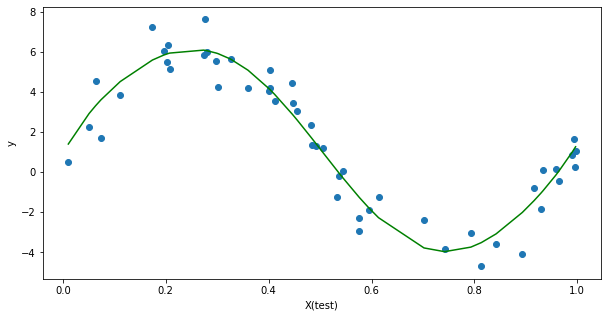

In [400]:
fig, axes = plt.subplots(1, 1, figsize=(10,5))

# scatter plot of test set
axes.scatter(np.transpose(x_test)[1], y_test)

# output of predictor function (a line)
unziped = list(zip(*sorted(zip(np.transpose(x_test)[1], predictions), key=lambda x: x[0])))
axes.plot(unziped[0], unziped[1], c='green')


axes.set_xlabel('X(test)')
axes.set_ylabel('y')
plt.show()

Evaluation

In [401]:
np.sqrt(mean_squared_error(y_test,predictions))

0.901156633790677

In [402]:
explained_variance_score(y_test,predictions)

0.9259981059794887

### Degree 11

In [403]:
df_mat = np.c_[df_mat, df.to_numpy() * np.c_[np.power(X, 8)]]
print(df_mat.shape)
#split
x_train, x_test, y_train, y_test = train_test_split(df_mat, y, test_size=0.2, random_state=42)

# #scaling
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train) + np.array([[1,0,0,0,0,0,0,0,0,0,0,0]])
x_test = scaler.transform(x_test) + np.array([[1,0,0,0,0,0,0,0,0,0,0,0]])

#regression
reg = LinearRegression().fit(x_train, y_train)
predictions = reg.predict(x_test)
predictions

(250, 12)


array([ 5.55821641,  0.04434536,  2.39363091,  2.70477922,  5.61423528,
       -1.00870655, -3.97833036,  0.86246094, -3.69387784,  0.76039694,
        4.00960733, -3.11905308,  0.67860002,  0.92752698, -1.15444392,
       -2.20285547,  6.17161466,  1.2735395 ,  6.14008659,  3.57064889,
       -0.27386179,  1.54236589,  3.80317518, -1.52007272, -3.4797099 ,
       -2.15294483,  2.93216893,  4.08079773, -1.16719954,  4.10270132,
        5.31654361, -1.66078738, -0.83905699,  4.89090533,  5.88541071,
        5.25368475,  6.12204384,  6.17489008,  1.24970879,  4.12780184,
        0.26131204,  6.16379417,  2.67845684, -0.03130256,  1.5130702 ,
        5.59015344,  5.49634709,  0.85793748, -3.80101347,  0.52994231])

Plotting

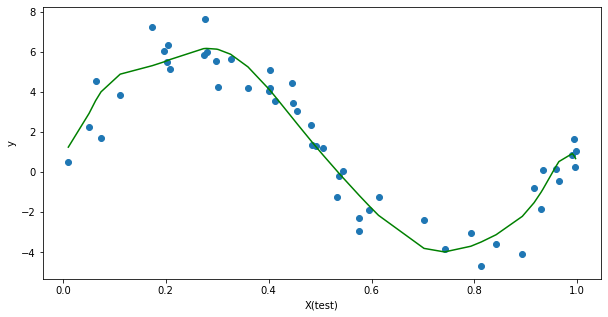

In [404]:
fig, axes = plt.subplots(1, 1, figsize=(10,5))

# scatter plot of test set
axes.scatter(np.transpose(x_test)[1], y_test)

# output of predictor function (a line)
unziped = list(zip(*sorted(zip(np.transpose(x_test)[1], predictions), key=lambda x: x[0])))
axes.plot(unziped[0], unziped[1], c='green')


axes.set_xlabel('X(test)')
axes.set_ylabel('y')
plt.show()

evaluation

In [405]:
np.sqrt(mean_squared_error(y_test,predictions))

0.9534963603874091

In [406]:
explained_variance_score(y_test,predictions)

0.9167097782603073

### Degree 16

In [408]:
df_mat = np.c_[df_mat, df.to_numpy() * np.c_[np.power(X, 12)], np.c_[np.power(X, 16)]]
print(df_mat.shape)
#split
x_train, x_test, y_train, y_test = train_test_split(df_mat, y, test_size=0.2, random_state=42)

# #scaling
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train) + np.array([[1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]])
x_test = scaler.transform(x_test) + np.array([[1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]])

#regression
reg = LinearRegression().fit(x_train, y_train)
predictions = reg.predict(x_test)
predictions

(250, 17)


array([ 5.48219525,  0.00697907,  2.35492621,  2.67190554,  5.50903146,
       -1.21075582, -4.17568393,  0.81749715, -3.76831643,  0.65361027,
        3.7816186 , -2.88256466,  0.4896556 ,  1.02887462, -1.14921347,
       -2.25276034,  6.07375915,  1.22774938,  6.13110329,  3.39377338,
       -0.3046047 ,  1.49684528,  3.81122804, -1.74138926, -3.40221658,
       -2.07952715,  2.88650921,  4.10420407, -1.1612375 ,  4.12738609,
        5.40427351, -1.62269979, -1.01148793,  4.85366098,  5.95925801,
        5.3436158 ,  6.12593574,  6.0864475 ,  1.28697083,  4.153962  ,
        0.45041148,  6.0519923 ,  2.64500185, -0.06733943,  1.46748666,
        5.49700116,  5.45711254,  0.86271172, -3.83871324,  0.81869383])

Plotting


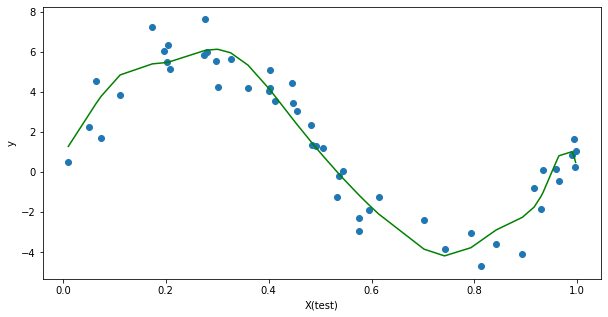

In [409]:
fig, axes = plt.subplots(1, 1, figsize=(10,5))

# scatter plot of test set
axes.scatter(np.transpose(x_test)[1], y_test)

# output of predictor function (a line)
unziped = list(zip(*sorted(zip(np.transpose(x_test)[1], predictions), key=lambda x: x[0])))
axes.plot(unziped[0], unziped[1], c='green')


axes.set_xlabel('X(test)')
axes.set_ylabel('y')
plt.show()

Evaluation

In [410]:
np.sqrt(mean_squared_error(y_test,predictions))

0.9688230114236247

In [411]:
explained_variance_score(y_test,predictions)

0.9137474444871964

### Degree 20

In [413]:
df_mat = np.c_[df_mat, df.to_numpy() * np.c_[np.power(X, 17)]]
print(df_mat.shape)
#split
x_train, x_test, y_train, y_test = train_test_split(df_mat, y, test_size=0.2, random_state=42)

# #scaling
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train) + np.array([[1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]])
x_test = scaler.transform(x_test) + np.array([[1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]])

#regression
reg = LinearRegression().fit(x_train, y_train)
predictions = reg.predict(x_test)
predictions

array([ 5.4758635 ,  0.04288024,  2.31366862,  2.67756837,  5.54625002,
       -1.28554074, -4.05163438,  0.73883862, -3.81984257,  0.44886001,
        3.60026473, -2.85015259,  0.34893306,  0.7671326 , -1.02964237,
       -2.24189154,  6.10330397,  1.11912832,  6.02049212,  3.19913755,
       -0.22500906,  1.38484277,  3.96357934, -1.83486358, -3.46588225,
       -2.08743682,  2.86233528,  4.26783915, -1.04224546,  4.29121051,
        5.26402983, -1.55073913, -1.06350604,  5.07645054,  5.80533806,
        5.35171722,  5.99997317,  6.0992039 ,  0.86565468,  4.31786906,
        0.59599098,  6.10694707,  2.64649939, -0.02032166,  1.35519655,
        5.51563698,  5.40304757,  0.61094936, -3.79126767,  0.96513113])

Plotting

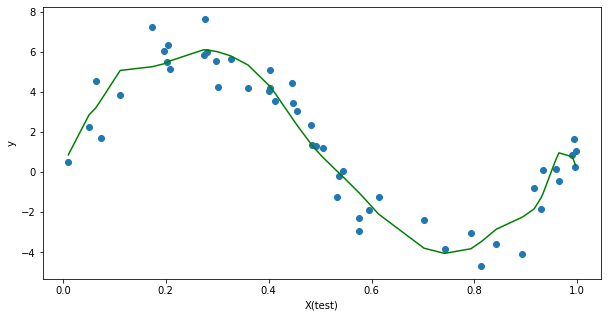

In [415]:
fig, axes = plt.subplots(1, 1, figsize=(10,5))

# scatter plot of test set
axes.scatter(np.transpose(x_test)[1], y_test)

# output of predictor function (a line)
unziped = list(zip(*sorted(zip(np.transpose(x_test)[1], predictions), key=lambda x: x[0])))
axes.plot(unziped[0], unziped[1], c='green')


axes.set_xlabel('X(test)')
axes.set_ylabel('y')
plt.show()

Evaluation

In [416]:
np.sqrt(mean_squared_error(y_test,predictions))

0.9862415366116042

In [417]:
explained_variance_score(y_test,predictions)

0.9105118029748983